In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [11]:
### x = [x, y, theta, phi]
def f(x): return np.array([np.sin(x[2])*np.cos(x[2])*x[1]**2,
                          -2*np.cos(x[2])/np.sin(x[2])*x[0]*x[1],
                          x[0],
                          x[1]])

In [3]:
def var_search (x0a,r1,r2):
    
    r1 = r1/np.linalg.norm(r1, ord=2)
    r2 = r2/np.linalg.norm(r2, ord=2)
    
    r3 = (r2-r1)/np.linalg.norm(r1-r2)
    r3 
    
    x0b = np.zeros(4)
    
    x0b[0] = x0a[0]
    x0b[1] = x0a[1]
    x0b[2] = np.arctan(r1[1]/r1[0])
    x0b[3] = np.arccos(r1[2])

    t = np.linspace(0,x0a[2],5000)

    N = t.size
    x = np.zeros((4,N))
    
    x[:,0] = x0b
    
    k = np.zeros((4,4))
    h = t[1]-t[0]

    a_dist = 0
    b_dist = np.linalg.norm(r3,ord=2)

    for i in range(1, t.size):
        
        k[:,0] = f(x[:,i-1])
        
        k[:,1] = f(x[:,i-1] + h/2*k[:,0])
    
        k[:,2] = f(x[:,i-1] + h/2*k[:,1])
    
        k[:,3] = f(x[:,i-1] + h*k[:,2])
    
        x[:,i] = x[:,i-1] + h/6*(k[:,0]+2*k[:,1]+2*k[:,2]+k[:,3])

    u = np.cos(x[2,-1])*np.sin(x[3,-1])
    v = np.sin(x[2,-1])*np.sin(x[3,-1])
    w = np.cos(x[3,-1])
    rf = np.array([u,v,w])

    return np.linalg.norm(r2-rf, ord=2)

Input points below.

In [4]:
r1 = np.array([0,-1,0])
r2 = np.array([1,0,1])

r1 = r1/np.linalg.norm(r1, ord=2)
r2 = r2/np.linalg.norm(r2, ord=2)

r3 = (r2-r1)/np.linalg.norm(r1-r2)

x0 = np.zeros(3)

x0[0] = np.arcsin(r3[0])
x0[1] = -np.arcsin(r3[2])
x0[2] = np.pi/2

rez = sp.optimize.minimize(var_search, x0, args=(r1,r2), method='Nelder-Mead', bounds=[(-np.pi,np.pi),(-np.pi,np.pi),(0,np.pi)])

/tmp/ipykernel_115128/3350316859.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  x0b[2] = np.arctan(r1[1]/r1[0])


In [5]:
def RK4 (f, x0, t):
    
    N = t.size
    x = np.zeros((4,N))
    
    x[:,0] = x0[:]
    
    k = np.zeros((4,4))
    h = t[1]-t[0]

    for i in range(1, t.size):
        
        k[:,0] = f(x[:,i-1])
        
        k[:,1] = f(x[:,i-1] + h/2*k[:,0])
    
        k[:,2] = f(x[:,i-1] + h/2*k[:,1])
    
        k[:,3] = f(x[:,i-1] + h*k[:,2])
    
        x[:,i] = x[:,i-1] + h/6*(k[:,0]+2*k[:,1]+2*k[:,2]+k[:,3])

    return x

In [6]:
x0c = np.array([rez.x[0], rez.x[1], np.arctan(r1[1]/r1[0]), np.arccos(r1[2])])
t = np.linspace(0,rez.x[2],5000)
x = RK4(f,x0c,t)

/tmp/ipykernel_115128/3624644008.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  x0c = np.array([rez.x[0], rez.x[1], np.arctan(r1[1]/r1[0]), np.arccos(r1[2])])


In [7]:
u = np.cos(x[2])*np.sin(x[3])
v = np.sin(x[2])*np.sin(x[3])
w = np.cos(x[3])

In [8]:
print('Distant point:          [{0:0.3f}, {1:0.3f}, {2:0.3f}]'.format(*r2))
print('Final calculated point: [{0:0.3f}, {1:0.3f}, {2:0.3f}]'.format(u[-1],v[-1],w[-1]))


Distant point:          [0.707, 0.000, 0.707]
Final calculated point: [0.707, -0.000, 0.707]


Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

Text(0.5, 0, 'Z')

Text(0.5, 0.92, 'Semitransparent Sphere')

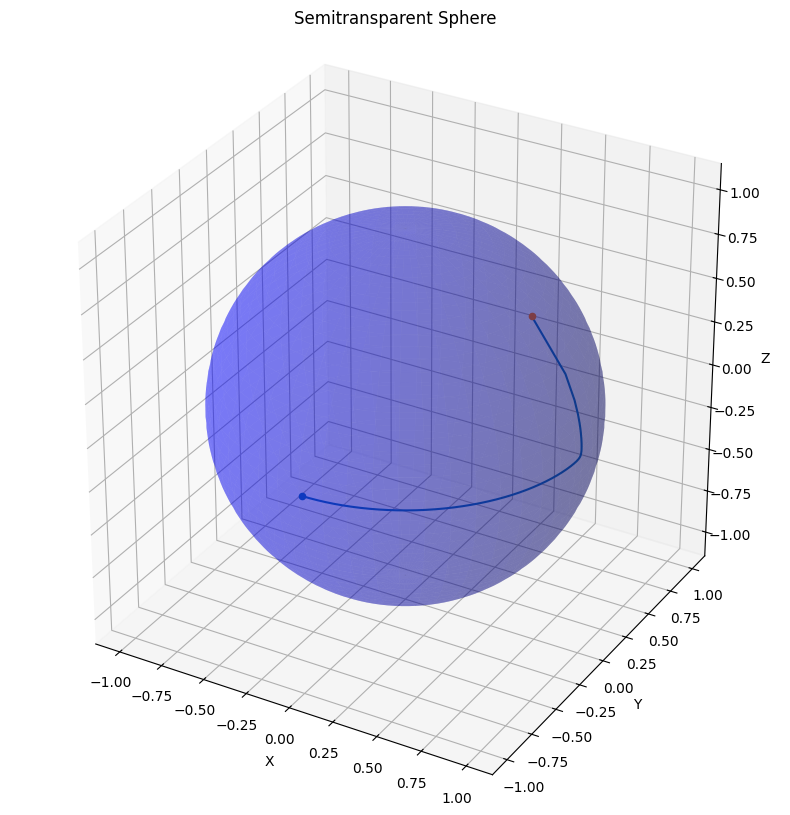

In [9]:
# Function to generate a sphere
def sphere(radius=1, center=(0, 0, 0), resolution=100):
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    
    return x, y, z

# Create the figure and the 3D axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Generate the sphere data
x, y, z = sphere()

# Plot the surface of the sphere
ax.plot_surface(x, y, z, color='b', alpha=0.3)  # Set alpha for transparency

# Set aspect ratio
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes

# Labels and title (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Semitransparent Sphere')

ax.plot(u,v,w)
ax.scatter(*r1)
ax.scatter(*r2)

# Show the plot
plt.show()